<a href="https://colab.research.google.com/github/AndjelaTodoric/PPPO_Projekat_FaceDetection/blob/main/IT22_2018_Andjela_Todoric_PPPO_Projekat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Detekcija lica**

## **Sadržaj**


1.   Uvod
2.   Face detection
3.   Detekcija lica pomoću HOG karakteristika
4.   Face recognition
5.   OpenCV
6.   Detekcija lica pomoću HaarCascade
7.   Detekcija lica pomoću MediaPipe
8.   Detekcija lica pomoću MTCNN-a
9.   Zaključak
10.  Literatura



## **Uvod**

Cilj izrade ovog rada jeste istražiti i videti primenu tehnika mašinskog učenja, kao i dubokog učenja za rešavanje problema obrade fotografije, konkretno detekcije lica. Sam rad se sastoji iz nekoliko celina, koje obuhvataju algoritme za obradu fotografija.
U nastavku rada obrađena je detekcija lica pomoću HOG karakteristika, zatim prepoznavanje lica na jednoj slici na kojoj postoji više lica, detekcija lica pomoću HaarCascade, MediaPipe i MTCNN biblioteka.  

Za samu izradu rada korišćen je *dataset* koji sadrži pet foldera, i u svakom folderu se nalazi oko 50 isečenih ( kropovanih ) fotografija lica glumaca iz *Avengers*-a. U dataset-u se nalaze sledeći glumci:

1.   Chris Evans
2.   Chris Hemsworth
3.   Mark Ruffalo
4.   Robert Downey Jr.
5.   Scarlett Johansson

Link do *dataset*-a je: https://drive.google.com/file/d/1sk0Uuycy_l9_SRmcWMIijhTwOAP-usnw/view

ID: 1sk0Uuycy_l9_SRmcWMIijhTwOAP-usnw



## **Face detection**

Detekcija lica je kompjuterska tehnologija zasnovana na veštačkoj inteligenciji koja se koristi za pronalaženje i identifikaciju ljudskih lica na digitalnim slikama. Tehnologija detekcije lica može se primeniti na različite oblasti, uključujući bezbednost, biometriju, sprovođenje zakona, zabavu i ličnu bezbednost, kako bi se obezbedio nadzor i praćenje ljudi u realnom vremenu. Detekcija lica je napredovala od rudimentalnih tehnika kompjuterske vizije do napretka u mašinskom učenju do sve sofisticiranijih veštačkih neuronskih mreža i srodnih tehnologija - rezultat je kontinuirano poboljšanje performansi.

Algoritmi za detekciju lica se fokusiraju na detekciju frontalnih ljudskih lica. To je analogno detekciji slike u kojoj se slika osobe poklapa malo po malo. Detekcija lica može predstavljati značajan deo operacija prepoznavanja lica. Metoda detekcije lica na slici je komplikovana zbog varijabilnosti prisutnih na ljudskim licima kao što su poza, izraz, položaj i orijentacija, boja kože, prisustvo naočara na licu, razlike u pojačanju kamere, uslovi osvetljenja i rezolucija slike. Primarni cilj algoritma za detekciju lica jeste da odredi da li na slici postoji lice ili ne.

Detekcija ( *detection* ) i prepoznavanje ( *recognition* ) su različiti zadaci.

*   *Face detection* ( Detekcija lica ) - je ključni deo prepoznavanja lica koji određuje broj lica na slici ili video snimku bez pamćenja ili čuvanja detalja. Može da definiše neke demografske podatke kao što su starost ili pol, ali ne može prepoznati pojedince.
*   *Face recognition* ( Prepoznavanje lica ) - identifikuje lice na fotografiji ili video snimku u odnosu na već postojeću bazu podataka lica. Lica moraju biti upisana u sistem da bi se stvorila baza podataka jedinstvenih crta lica. Nakon toga, sistem rastavlja novu sliku na ključne karakteristike i upoređuje ih sa informacijama sačuvanim u bazi podataka.

Prvo, računar pregleda ili fotografiju ili video sliku i pokušava da razlikuje lica od drugih objekata u pozadini. Postoje metode koje računar može da koristi da bi to postigao, kompenzujući osvetljenje, orijentaciju ili udaljenost kamere. Jang, Krigman i Ahuja predstavili su klasifikaciju metoda detekcije lica. Ove metode su podeljene u četiri kategorije, a algoritmi za detekciju lica mogu pripadati dve ili više grupa. Kategorije su sledeće:

1.   Detekcija lica zasnovana na znanju
2.   Detekcija lica u skladu sa šablonom
3.   Detekcija lica zasnovano na karakteristikama
4.   Detekcija lica zasnovano na izgledu





Učitavanje *dataset*-a potrebnog za izradu zadatka.

In [1]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1sk0Uuycy_l9_SRmcWMIijhTwOAP-usnw' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1sk0Uuycy_l9_SRmcWMIijhTwOAP-usnw" -O images.zip && rm -rf /tmp/cookies.txt

--2022-06-26 18:34:53--  https://docs.google.com/uc?export=download&confirm=t&id=1sk0Uuycy_l9_SRmcWMIijhTwOAP-usnw
Resolving docs.google.com (docs.google.com)... 108.177.126.139, 108.177.126.113, 108.177.126.102, ...
Connecting to docs.google.com (docs.google.com)|108.177.126.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/cspahkl9jl6j5qm3qedf06d4l1e2dqsm/1656268425000/06049624160957438625/*/1sk0Uuycy_l9_SRmcWMIijhTwOAP-usnw?e=download [following]
--2022-06-26 18:34:54--  https://doc-14-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/cspahkl9jl6j5qm3qedf06d4l1e2dqsm/1656268425000/06049624160957438625/*/1sk0Uuycy_l9_SRmcWMIijhTwOAP-usnw?e=download
Resolving doc-14-64-docs.googleusercontent.com (doc-14-64-docs.googleusercontent.com)... 108.177.119.132, 2a00:1450:4013:c00::84
Connecting to doc-14-64-docs.googleusercontent.com (doc-

Unzip *dataset*-a

In [2]:
!unzip images.zip

Archive:  images.zip
replace cropped_images/chris_evans/chris_evans1.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: cropped_images/chris_evans/chris_evans1.png  
  inflating: cropped_images/chris_evans/chris_evans10.png  
  inflating: cropped_images/chris_evans/chris_evans11.png  
  inflating: cropped_images/chris_evans/chris_evans12.png  
  inflating: cropped_images/chris_evans/chris_evans13.png  
  inflating: cropped_images/chris_evans/chris_evans14.png  
  inflating: cropped_images/chris_evans/chris_evans15.png  
  inflating: cropped_images/chris_evans/chris_evans16.png  
  inflating: cropped_images/chris_evans/chris_evans17.png  
  inflating: cropped_images/chris_evans/chris_evans18.png  
  inflating: cropped_images/chris_evans/chris_evans19.png  
  inflating: cropped_images/chris_evans/chris_evans2.png  
  inflating: cropped_images/chris_evans/chris_evans20.png  
  inflating: cropped_images/chris_evans/chris_evans21.png  
  inflating: cropped_images/chris_evans/chris_ev

## **Detekcija lica pomoću HOG karakteristika**

HOG ( Histogram orijentisanih gradijenata ) sa linearnim SVM algoritmom mašinskog učenja služi za obavljanje detekcije lica. HOG je jednostavan i moćan deskriptor karakteristika. Ne koristi se samo za detekciju lica, već se koristi i za detekciju objekata poput automobila, kućnih ljubimaca i voća. HOG je robustan za detekciju objekata jer se oblik objekta karakteriše korišćenjem distribucije gradijenta lokalnog intenziteta i pravca ivice. Osnovna ideja HOG-a je podela slike na male povezane ćelije. Zatim se izračunava histogram za svaku ćeliju. Nakon toga, objedinjuju se svi histogrami da bi se formirali vektori obeležja, tj. formira se jedan histogram od svih maloh histograma koji je jedinstven za svako lice. Jedini nedostatak detekcije lica zasnovanog na HOG-u je to što ne radi na licima pod neparnim uglovima, radi samo sa ravnim i prednjim licima. Korisno je ako se koristi za otkrivanje lica iz skeniranih dokumenata kao što su vozačka dozvola i pasoš, ali nije dobro za video u realnom vremenu.

1


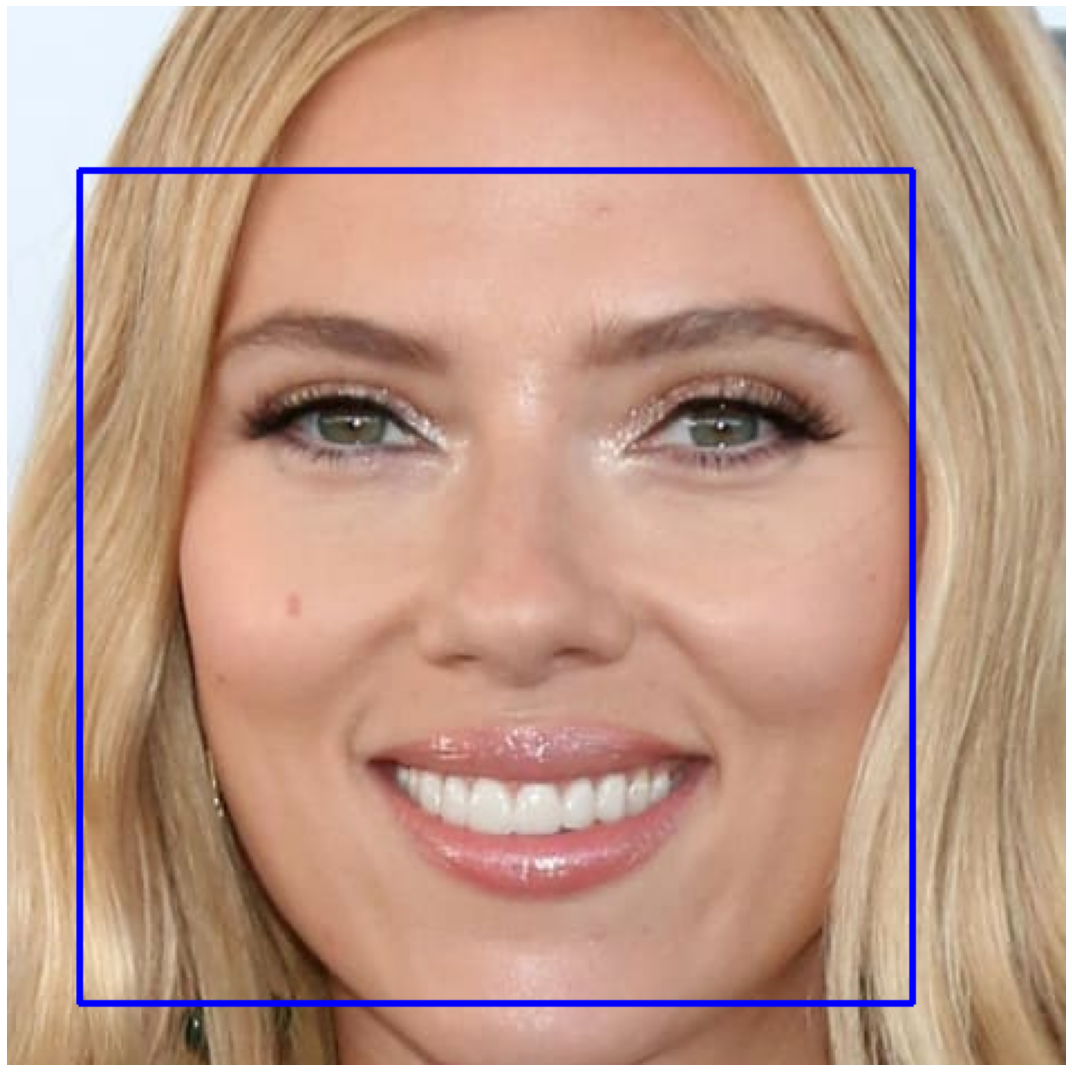

In [3]:
#Importovanje potrebnih biblioteka
import cv2
import dlib
import matplotlib.pylab as plt

#Učitavanje fotografije i njeno konvertovanje u RGB
img = cv2.cvtColor(cv2.imread('cropped_images/scarlett_johansson/scarlett_johansson42.png'), cv2.COLOR_BGR2RGB)
#Vraća dlib-ov hog detektor lica
hog_detector = dlib.get_frontal_face_detector()
faces = hog_detector(img, 0)

#Vraća broj detektovanih lica
print(len(faces))

#Prolazak kroz svako lice i crtanje pravougaonika oko njega (u ovom slučaju je samo jedno lice)
for face in faces:
    left,top,right,bottom = face.left(), face.top(), face.right(), face.bottom()
    #Crtanje pravoougaonika
    img = cv2.rectangle(img,(left,top),(right,bottom),(0,0,255),2)

#Prikaz rezultata fotografije
plt.figure(figsize=(15,20))
plt.imshow(img), plt.axis('off')
plt.tight_layout()
plt.show()

## **Face recognition**

Ljudska bića obavljaju prepoznavanje lica automatski svaki dan i praktično bez napora. Iako za nas zvuči kao veoma jednostavan zadatak, pokazao se kao složen zadatak za računar, jer ima mnogo promenljivih koje mogu da ugroze tačnost metoda, na primer: varijacija osvetljenja, niska rezolucija, okluzija, između ostalog. Prepoznavanje lica je u osnovi zadatak prepoznavanja osobe na osnovu njene slike lica. Postao je veoma popularan u poslednje dve decenije, uglavnom zbog novih razvijenih metoda i visokog kvaliteta trenutnih video zapisa/kamera. Sistem za prepoznavanje lica je tehnologija koja je sposobna da uporedi ljudsko lice sa digitalne slike ili video okvira sa bazom podataka lica, koja se obično koristi za autentifikaciju korisnika putem usluga verifikacije ID-a, radi preciziranja i merenja crta lica sa date slike. Prednost korišćenja ove tehnologije se ogleda i u tome što može da utiče na odvraćanje od protivzakonitog i antisocijalnog ponašanja, dok je mana ove tehnologije ugrožavanje privatnosti. Sistemi za prepoznavanje lica razlikuju se po svojoj sposobnosti da identifikuju ljude u izazovnim uslovima kao što su loše osvetljenje, rezolucija slike niskog kvaliteta i podoptimalan ugao gledanja. Napravljeno je pomoću dlib-ovog najsavremenijeg prepoznavanja lica, i izgrađeno dubokim učenjem. Model ima tačnost od 99,38%. Sistemi za prepoznavanje lica imaju tendenciju da variraju, ali generalno rade na sledeći način: prvo se vrši detekcija lica, zatim se lice analizira, pa se slika pretvara u podatke, i na kraju se pronalazi podudaranje.

Instalacija potrebne biblioteke za face recognition.

In [4]:
!pip install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


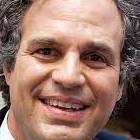

In [5]:
from PIL import Image, ImageDraw
from IPython.display import display

#Učitavanje i prikaz fotografije
pil_im = Image.open('cropped_images/mark_ruffalo/mark_ruffalo5.png')
display(pil_im)

In [6]:
#Importovanje potrebnih biblioteka
import face_recognition
import numpy as np
from PIL import Image, ImageDraw
from IPython.display import display

#Primer prepoznavanja više lica na jednoj slici i iscrtavanje pravougaonika oko svake identifikovane osobe (lica)

#Učitavanje slike i učenje kako da prepozna osobu
scarlett_image = face_recognition.load_image_file('cropped_images/scarlett_johansson/scarlett_johansson45.png')
scarlett_face_encoding = face_recognition.face_encodings(scarlett_image) [0]

#Učitavanje slike druge osobe
chris_image = face_recognition.load_image_file('cropped_images/chris_evans/chris_evans18.png')
chris_face_encoding = face_recognition.face_encodings(chris_image) [0]

#Učitavanje slike treće osobe
robert_image = face_recognition.load_image_file('cropped_images/robert_downey_jr/robert_downey_jr44.png')
robert_face_encoding = face_recognition.face_encodings(robert_image) [0]

#Pravljenje niza poznatih lica i učenje njihovih imena
known_face_encodings = [
    scarlett_face_encoding,
    chris_face_encoding,
    robert_face_encoding
]
known_face_names = [
    "Scarlett Johansson",
    "Chris Evans", 
    "Robert Downey"
]

#Ispis koliko je lica poznato
print('Learned encoding for', len(known_face_encodings), 'images.')

Learned encoding for 3 images.


In [7]:
#Kreiranje foldera i ubacivanje slike sa više lica
!mkdir known
!wget https://collider.com/wp-content/uploads/the-avengers-cast-slice.jpg -O known/avengers.jpg

mkdir: cannot create directory ‘known’: File exists
--2022-06-26 18:35:21--  https://collider.com/wp-content/uploads/the-avengers-cast-slice.jpg
Resolving collider.com (collider.com)... 3.223.39.19
Connecting to collider.com (collider.com)|3.223.39.19|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23182 (23K) [image/jpeg]
Saving to: ‘known/avengers.jpg’

known/avengers.jpg  100%[===================>]  22.64K  --.-KB/s    in 0s      

2022-06-26 18:35:21 (273 MB/s) - ‘known/avengers.jpg’ saved [23182/23182]



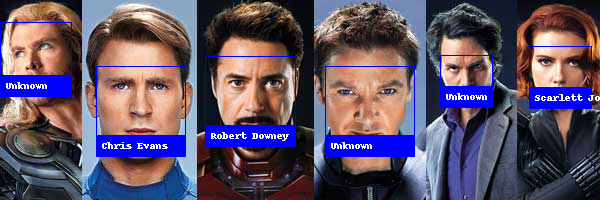

In [8]:
#Učitavanje slike sa nepoznatim licem
unknown_image = face_recognition.load_image_file('known/avengers.jpg')

#Pronalaženje svih lica na slici
face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

#Slika se konvertuje u PIL-format da bi se uspešno iscrtavao pravougaonik na njoj uz pomoć Pillow biblioteke
pil_image = Image.fromarray(unknown_image)

#Pravljenje instance za uspešno crtanje
draw = ImageDraw.Draw(pil_image)

#Izlistavanje svakog lica na nepoznatoj slici
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    #Provera da li se lice podudara sa poznatim licem
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

    name = "Unknown"

    #Ili umesto toga se koristi poznato lice sa najmanjom distancom od novog lica
    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = known_face_names[best_match_index]

    #Iscrtavanje pravougaonika oko detektovanog lica
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))

    #Ispisiivanje imena ispod detektovanog lica
    text_width, text_height = draw.textsize(name)
    draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
    draw.text((left + 6, bottom - text_height - 5), name, fill=(255, 255, 255, 255))


#Uklanjanje biblioteke crteža iz memorije
del draw

#Prikazivanje rezultata slike
display(pil_image)

## **OpenCV**

OpenCV ( *Open Source Computer Vision Library* ) je biblioteka softvera za računarsku viziju i mašinsko učenje otvorenog koda. OpenCV je napravljen da obezbedi zajedničku infrastrukturu za aplikacije računarskog vida i da ubrza upotrebu mašinske percepcije u komercijalnim proizvodima. Budući da je proizvod sa BSD licencom, OpenCV olakšava preduzećima da koriste i modifikuju kod.

Biblioteka ima više od 2500 optimizovanih algoritama, što uključuje sveobuhvatan skup klasičnih i najsavremenijih algoritama kompjuterskog vida i mašinskog učenja. Ovi algoritmi se mogu koristiti za otkrivanje i prepoznavanje lica, identifikaciju objekata, klasifikovanje ljudskih radnji u video zapisima, praćenje kretanja kamere, praćenje objekata u pokretu, izdvajanje 3D modela objekata, proizvodnju 3D oblaka tačaka sa stereo kamera, spajanje slika kako bi se proizvela visoka rezolucija sliku cele scene, pronalazak slične slike iz baze podataka slika, uklanjanje crvenih očiju sa slika snimljenih korišćenjem blica, praćenje pokreta očiju, prepoznavanje pejzaža i postavljanje markera koji će ga prekriti proširenom stvarnošću, itd. OpenCV ima više od 47 hiljada ljudi korisnika zajednice i procenjeni broj preuzimanja veći od 18 miliona. Biblioteka se u velikoj meri koristi u preduzećima, istraživačkim grupama i od strane državnih organa.

OpenCV je izvorno napisan u C++ i ima šablonski interfejs koji besprekorno radi sa STL kontejnerima. Prednost je u tome što će se većina slika negativnih vrednosti dati u prvih nekoliko faza, što znači da algoritam neće gubiti vreme testirajući svih 6.000 karakteristika na njemu. Umesto satima, otkrivanje lica sada se može obaviti u realnom vremenu.

## **Detekcija lica pomoću HaarCascade**

Detekcija lica pomoću HaarCascade je pristup zasnovan na mašinskom učenju gde se kaskadna funkcija obučava sa skupom ulaznih podataka. OpenCV već sadrži mnogo unapred obučenih klasifikatora za lice, oči, osmehe, itd. U nastavku su korišćeni klasifikatori za lice, oči i osmeh. To je algoritam za detekciju objekata koji se koristi za identifikaciju lica na slici ili videu u realnom vremenu. 

*   Detekcija radi samo sa nijansama sive i zato je potrebno pretvoriti sliku u sivu boju.
*   *detectMultiScale* funkcija se koristi za otkrivanje lica. Potrebna su joj 3 argumenta: ulazna slika, *scaleFactor* ( određuje koliko se veličina slike smanjuje sa svakom skalom ) i *minNeighbors* ( specificira koliko suseda svaki pravougaonik kandidata treba da ima da ga zadrži ).
*   *faces* - sadrži listu koordinata za pravougaone oblasti u kojima su lica pronađena. Koriste se ove koordinate da bi se nacrtali pravougaonici na slici.

Haar Cascade Detection je jedan od najstarijih, ali moćnih izumljenih algoritama za detekciju lica. Bio je tu dugo, mnogo pre nego što je duboko učenje postalo poznato. Haar karakteristike nisu korišćene samo za otkrivanje lica, već i za oči, usne, registarske tablice itd. Modeli se čuvaju na GitHub-u i može im se pristupiti pomoću OpenCV metoda.



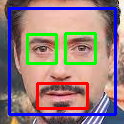

-1

In [9]:
#Importovanje potrebne biblioteke
import cv2
from google.colab.patches import cv2_imshow

#Učitavanje klasifikatora lica, oka i osmeha
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))
eye_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_eye.xml'))
smile_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_smile.xml'))

#Učitavanje fotografije
img = cv2.imread('cropped_images/robert_downey_jr/robert_downey_jr9.png')

#Konvertovanje fotografije u sivu boju
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#Detektovanje lica
faces = face_cascade.detectMultiScale(gray, 1.1, 4)

#Prolazak kroz sva lica i crtanje pravougaonika 
for (x, y, w, h) in faces:
    #Crtanje pravougaonika
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    
    #Detektovanje očiju i crtanje pravougaonika oko levog i desnog oka
    eyes = eye_cascade.detectMultiScale(roi_gray, 1.04, 10)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

    #Detektovanje osmeha i crtanje pravougaonika oko njega
    smile = smile_cascade.detectMultiScale(roi_gray, 1.38, 6)
    for (mx,my,mw,mh) in smile:
        cv2.rectangle(roi_color,(mx,my),(mx+mw,my+mh),(0,0,255),2)

#Prikaz rezultata fotografije
cv2_imshow(img)
cv2.waitKey()

## **Detekcija lica pomoću MediaPipe**

MediaPipe Face Detection je ultrabrzo rešenje za detekciju lica koje dolazi sa 6 orijentira i podrškom za više lica. Zasnovan je na *BlazeFace*-u, laganom detektoru lica sa dobrim performansama prilagođenom za zaključivanje mobilnog GPU-a. Performanse detektora u super realnom vremenu omogućavaju da se primeni na bilo koje iskustvo koje zahteva tačan region lica od interesa kao ulaz za druge modele specifične za zadatak, kao što je 3D procena ključne tačke lica (npr. *MediaPipe Face Mesh*), karakteristike lica ili klasifikaciju izraza, i segmentaciju regiona lica. *BlazeFace* koristi laganu mrežu za ekstrakciju karakteristika inspirisanu, ali različitu od MobileNetV1/V2, šemom prilagođenom GPU-u koji je modifikovan iz *Single Shot MultiBok Detector*-a (SSD) i poboljšanom strategijom rezolucije veza koja je alternativa ne-maksimalnom potiskivanju. 

Instaliranje potrebne biblioteke

In [10]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Nose tip:
x: 0.5201892852783203
y: 0.6158462762832642



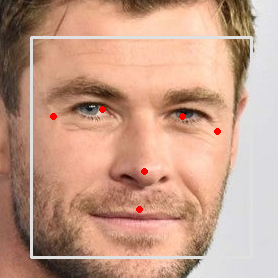

-1

In [11]:
#Importovanje potrebnih biblioteka
import cv2
import mediapipe as mp

#Inicijalizacija MediaPipe modela za detekciju
mp_face_detection = mp.solutions.face_detection
#Korišćeni su MediaPipe alati za crtanje da bi se lakše nacrtao pravougaonik i tačke na licu
mp_drawing = mp.solutions.drawing_utils

#Dodeljivanje promenljive za sliku koja će se učitati
IMAGE_FILES = ['cropped_images/chris_hemsworth/chris_hemsworth20.png']
#Učitavanje modela detekcije lica gde se podešava model selection i prag pouzdanosti rezultata detekcije koji se podešava prema ulaznoj slici
with mp_face_detection.FaceDetection(
    model_selection=1, min_detection_confidence=0.5) as face_detection:
  
  #Prolazak kroz slike ako ih ima više, u ovom slučaju samo jedna, i njeno učitavanje
  for idx, file in enumerate(IMAGE_FILES):
    image = cv2.imread(file)
    #Pretvara se slika u RGB i obrađuje se pomoću MediaPipe detekcije lica
    results = face_detection.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    #Crtanje svake detekcije na slici
    if not results.detections:
      continue
    annotated_image = image.copy()
    #Iterira se preko svake detekcija i icrtava se na slici
    for detection in results.detections:
      print('Nose tip:')
      print(mp_face_detection.get_key_point(
          detection, mp_face_detection.FaceKeyPoint.NOSE_TIP))
      mp_drawing.draw_detection(annotated_image, detection)
    cv2.imwrite('/tmp/annotated_image' + str(idx) + '.png', annotated_image)

#Prikaz rezultata fotografije
cv2_imshow(annotated_image)
cv2.waitKey()

## **Detekcija lica pomoću MTCNN-a**

MTCNN ( *MultiTask Cascaded Convolutional Neural Network* ) je moderan alat za detekciju lica, koji koristi detektor neuronske mreže u 3 faze. Prvo, veličina slike se menja više puta da bi se otkrila lica različitih veličina. Zatim P-mreža ( *Proposal* ) skenira slike, vršeći prvu detekciju. Ima nizak prag za detekciju i stoga otkriva mnogo lažnih pozitivnih rezultata, čak i nakon NMS ( nemaksimalne supresije ), ali namerno radi ovako.
Predloženi regioni (koji sadrže mnogo lažnih pozitivnih rezultata) ulazni su za drugu mrežu, R-mrežu ( *Refine* ), koja, kao što ime kaže, filtrira detekcije ( takođe sa NMS ) da bi se dobila prilično precizna granična polja.
U završnoj fazi, O-mreža ( Output ) vrši završno prečišćavanje graničnih okvira. Na ovaj način se ne detektuju samo lica, već su i granične kutije veoma ispravne i precizne. Opciona karakteristika MTCNN-a je otkrivanje orijentira na licu, tj. očiju, nosa i uglova usta. Gotovo je besplatno, jer se ionako koriste za detekciju lica u procesu, što je dodatna prednost ako su potrebni ( npr. za poravnavanje lica ). MTCNN je veoma precizan i robustan. Pravilno detektuje lica čak i sa različitim veličinama, osvetljenjem i jakim rotacijama. Malo je sporiji od detektora *Viola-Jones*, ali sa GPU-om ne mnogo. Takođe koristi informacije o boji, pošto CNN dobijaju RGB slike kao ulaz.

Instaliranje potrebne biblioteke

In [12]:
!pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
#Importovanje potrebnih biblioteka
from mtcnn.mtcnn import MTCNN
import cv2
from google.colab.patches import cv2_imshow

#Učitavanje fotografije za obradu
image = cv2.imread('cropped_images/scarlett_johansson/scarlett_johansson1.png')

#Učitavanje detektora i detektovanje lica
detector = MTCNN()
faces = detector.detect_faces(image)

#Za izlaz se dobijaju koordinate okvira lica, levog oka, desnog oka, nosa, leve ivice usta i desne ivice usta
for face in faces:
  print(face)

{'box': [52, 0, 700, 872], 'confidence': 0.9999958276748657, 'keypoints': {'left_eye': (311, 290), 'right_eye': (619, 353), 'nose': (472, 470), 'mouth_left': (256, 597), 'mouth_right': (553, 653)}}


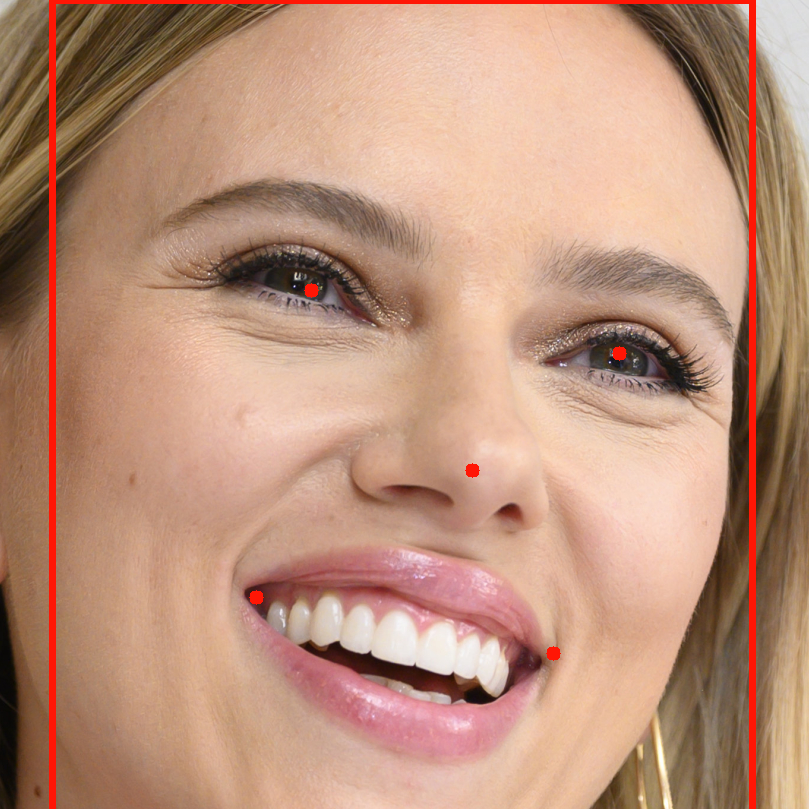

In [14]:
#Kreiranje okvira koji ce na slici biti prikazan kao pravougaonik 
def create_box(image):
  #Detektovanje lica na slici
  faces = detector.detect_faces(image)
  bounding_box = faces[0]['box']
  keypoints = faces[0]['keypoints']

  #Crtanje pravougaonika (cv2.rectangle(fotografija, start_point, end_point, boja, debljina))
  cv2.rectangle(image,
                (bounding_box[0], bounding_box[1]),
                (bounding_box[0] + bounding_box[2], bounding_box[1] + bounding_box[3]),
                (5, 22, 255),
                5)
  
  #Kreiranje tacki koje ce oznacavati levo i desno oko, nos i levu i desnu ivicu usta
  cv2.circle(image,(keypoints['left_eye']), 2, (5, 22, 255), 10)
  cv2.circle(image,(keypoints['right_eye']), 2, (5, 22, 255), 10)
  cv2.circle(image,(keypoints['nose']), 2, (5, 22, 255), 10)
  cv2.circle(image,(keypoints['mouth_left']), 2, (5, 22, 255), 10)
  cv2.circle(image,(keypoints['mouth_right']), 2, (5, 22, 255), 10)

  return image

#Hvatanje slike iz fukcije za ivičenje i njen prikaz
marked_image = create_box(image)
cv2_imshow(marked_image)

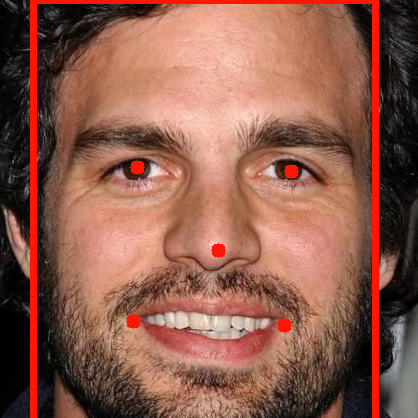

In [15]:
#Prikaz još jedne slike
marked_image = create_box(cv2.imread('cropped_images/mark_ruffalo/mark_ruffalo27.png'))
cv2_imshow(marked_image)

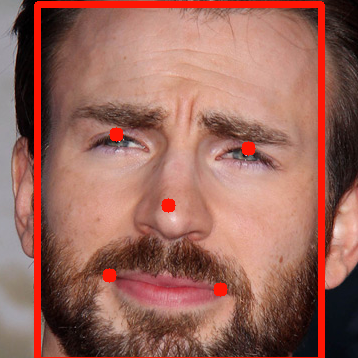

In [16]:
marked_image = create_box(cv2.imread('cropped_images/chris_evans/chris_evans14.png'))
cv2_imshow(marked_image)

## **Zaključak**

Izrada ovog projekta bila je veoma zanimljiva, i pored toga mi je donela još jedno novo iskustvo u oblasti *Deep Learning*-a. Pri samoj izradi dosta sam istraživala ovu oblast, da bih pokušala da obradim što više različitih algoritama za detekciju lica i na kraju ih u ovom zaključku uporedim. Svaki od algoritama koji su obrađeni u ovom radu su na neki način korisni i mogu se koristiti i u realnim situacijama. Za početak sama tema je bila vrlo zanimljiva i može se primeniti i u sadašnjosti. 

Detekcija lica pomoću HOG karakteristika je jednostavna metoda koja detektuje granice lica. Nakon toga obrađeno je prepoznavanje lica na slici sa više lica, što je bilo jako zanimljivo raditi, mada sama biblioteka face_recognition nije možda najprimenjivija u stvarnosti obzirom da je potrebno imati konačan skup poznatih lica kako bi se mogla prepoznati sva lica. Što se tiče HaarCascade biblioteke za detekciju lica, ona je takođe bila zanimljiva za istraživanje i isprobavanje na koje načine se lice može detektovati. Detekcije lica pomoću MediaPipe i MTCNN su jako slične i dosta interesantne za korišćenje, ali i veoma rasprostranjene u današnje vreme. Svaki od ovih algoritama je moguće primeniti u potrebnim situacijama.

## **Literatura**

[1] https://www.techtarget.com/searchenterpriseai/definition/face-detection

[2] https://machinelearningmastery.com/how-to-perform-face-detection-with-classical-and-deep-learning-methods-in-python-with-keras/

[3] https://www.youtube.com/watch?v=-0qQ_ukDbl8

[4] https://towardsdatascience.com/face-detection-in-2-minutes-using-opencv-python-90f89d7c0f81

[5] https://google.github.io/mediapipe/solutions/face_detection.html

[6] https://medium.com/sciforce/face-detection-explained-state-of-the-art-methods-and-best-tools-f730fca16294
